In [1]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# License: MIT

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0)

Moons dataset

In [2]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

In [3]:
def plot_data(X):
    sns.scatterplot(x=X[:, 0], y=X[:, 1], edgecolor='k', legend=False)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')

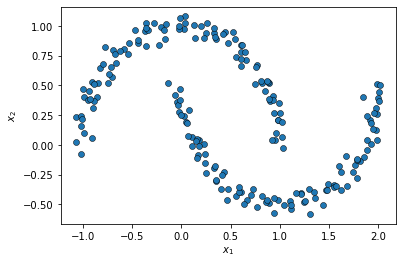

In [4]:
plot_data(X)
plt.savefig('figures/moons_data.pdf')

In [5]:
from sklearn.cluster import SpectralClustering

sc = SpectralClustering(n_clusters=2, random_state=0)
labels = sc.fit_predict(X)

In [6]:
def plot_clusters(X, labels):
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='tab10', edgecolor='k', legend=False)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')

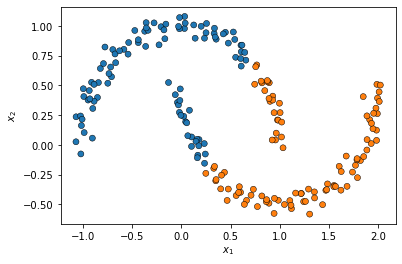

In [7]:
plot_clusters(X, labels)
plt.savefig('figures/moons_spectral_gamma_1.pdf')

In [8]:
gamma = 1 / (2 * 0.15**2)
gamma

22.22222222222222

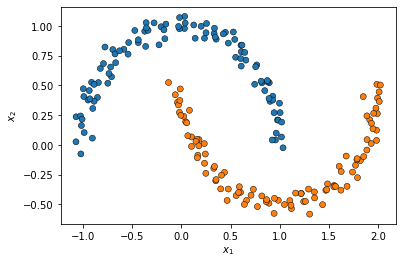

In [9]:
sc = SpectralClustering(n_clusters=2, gamma=20, random_state=0) 
labels = sc.fit_predict(X)

plot_clusters(X, labels)
plt.savefig('figures/moons_spectral_gamma_20.pdf')

C:\Users\roi_y\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


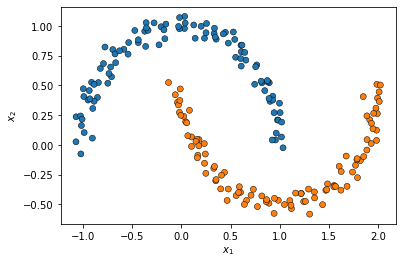

In [10]:
sc = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=0) 
labels = sc.fit_predict(X)

plot_clusters(X, labels)
plt.savefig('figures/moons_spectral_nearest_neighbors.pdf')

Compound dataset

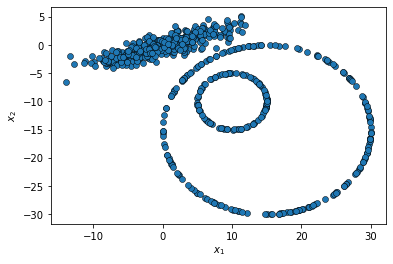

In [11]:
def compound_data(random_seed=0):
    random_state = np.random.RandomState(random_seed)
    
    # Generate the three clusters    
    # 1. Main elliptical cluster
    x1 = random_state.normal(0, 5, 400)
    y1 = x1 / 3 + random_state.normal(0, 1, 400)

    # 2. Small circle cluster
    angle2 = random_state.uniform(0, 2 * np.pi, 100)
    x2 = 5 * np.cos(angle2) + 10
    y2 = 5 * np.sin(angle2) - 10

    # 3. Larger circle cluster
    angle3 = random_state.uniform(0, 2 * np.pi, 200)
    x3 = 15 * np.cos(angle3) + 15
    y3 = 15 * np.sin(angle3) - 15

    return np.vstack((np.hstack((x1, x2, x3)), np.hstack((y1, y2, y3)))).T

X = compound_data()
plot_data(X)
plt.savefig('figures/compound_dataset.pdf')

C:\Users\roi_y\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


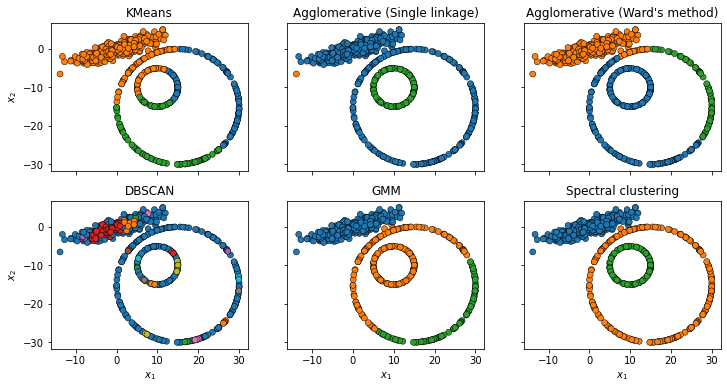

In [36]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture

fig, axes = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(12, 6))

plt.sca(axes[0, 0])
kmeans = KMeans(n_clusters=3, random_state=0) 
labels = kmeans.fit_predict(X)
plot_clusters(X, labels)
plt.title('KMeans')

plt.sca(axes[0, 1])
agg = AgglomerativeClustering(n_clusters=3, linkage='single')
labels = agg.fit_predict(X)
plot_clusters(X, labels)
plt.title('Agglomerative (Single linkage)')

plt.sca(axes[0, 2])
agg = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = agg.fit_predict(X)
plot_clusters(X, labels)
plt.title('Agglomerative (Ward\'s method)')

plt.sca(axes[1, 0])
dbscan = DBSCAN()
labels = dbscan.fit_predict(X)
plot_clusters(X, labels)
plt.title('DBSCAN')

plt.sca(axes[1, 1])
gmm = GaussianMixture(n_components=3)
labels = gmm.fit_predict(X)
plot_clusters(X, labels)
plt.title('GMM')

plt.sca(axes[1, 2])
sc = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=0) 
labels = sc.fit_predict(X)
plot_clusters(X, labels)
plt.title('Spectral clustering')

plt.savefig('figures/compound_clustering_comparison.pdf')